In [ ]:
!pip install PyWavelets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pywt
import pywt.data

In [ ]:
def dwt_transform(image):
  titles = ['Approximation', ' Horizontal detail',
            'Vertical detail', 'Diagonal detail']

  coeffs2 = pywt.dwt2(image, 'bior1.3')
  LL, (LH, HL, HH) = coeffs2
  fig = plt.figure(figsize=(12, 3))
  for i, a in enumerate([LL, LH, HL, HH]):
      ax = fig.add_subplot(1, 4, i + 1)
      ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
      ax.set_title(titles[i], fontsize=10)
      ax.set_xticks([])
      ax.set_yticks([])

  fig.tight_layout()
  plt.show()

  return LL, LH, HL, HH

In [ ]:
def inverse_dwt(LL, LH, HL, HH):
  return pywt.idwt2((LL, (LH, HL, HH)), 'bior1.3')

In [ ]:
def main(path):
  image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  LL, LH, HL, HH = dwt_transform(image)
  inverse_dwt_image = inverse_dwt(LL, LH, HL, HH)
  print("Image created using Inverse DWT")
  plt.imshow(inverse_dwt_image, cmap='gray')
  plt.show()

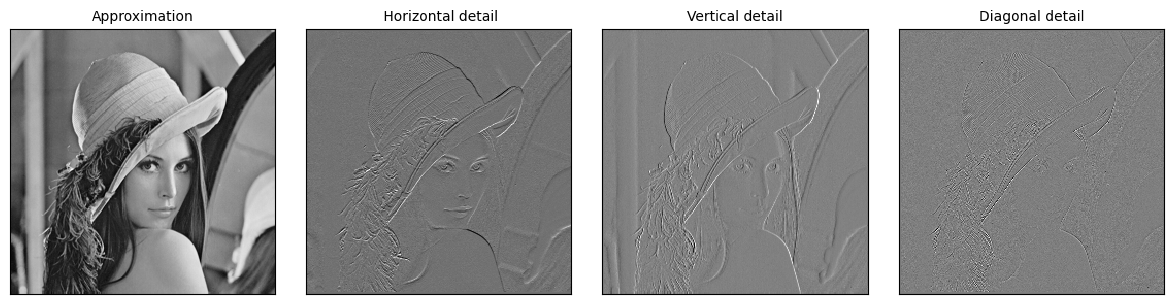

Image created using Inverse DWT


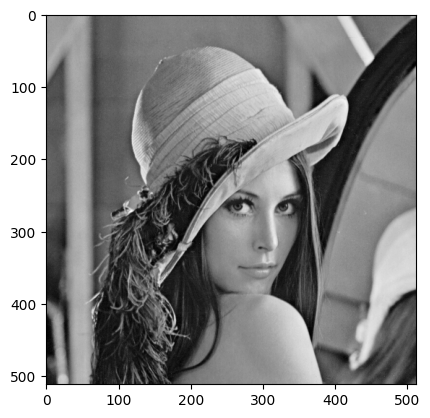

In [ ]:
path = "/content/lena.png"
main(path)

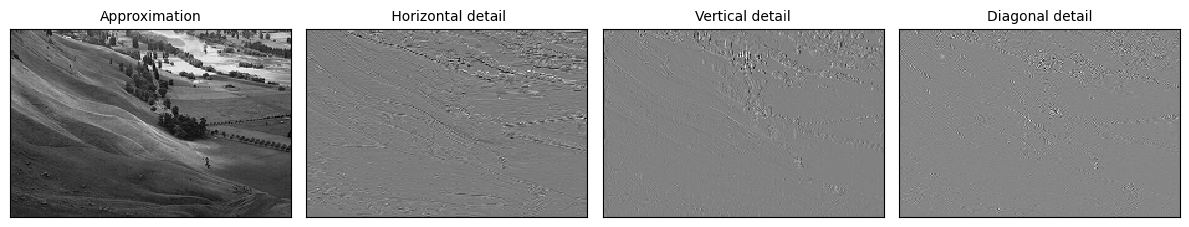

Image created using Inverse DWT


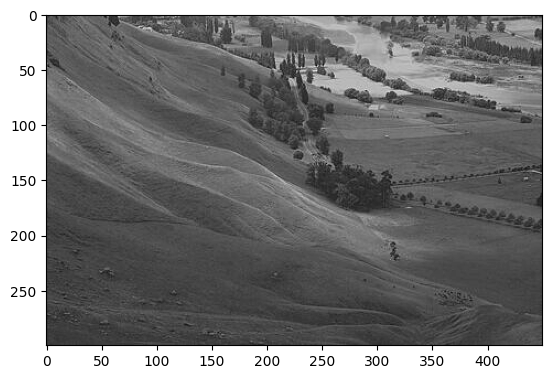

In [ ]:
path = "/content/image3.jpg"
main(path)